<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/CNN_and_LSTM_for_Natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tf_keras.preprocessing.text import Tokenizer
from tf_keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, LSTM
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/artanebibi/Datasets/refs/heads/main/emotions-dataset.csv")
df

,message,emotion
0,i used to be able to hang around talk with the...,anger
1,i get made to feel left out and unimportant in...,sadness
2,i wasnt going to post today as i am feeling qu...,sadness
3,i feel extremely delicate and a bit helpless,love
4,i feel frightened that i might fail to notice ...,fear
...,...,...
11995,i feel useless for wasting k hours k just for ...,sadness
11996,i feel rushed and pulled and rung out and i kn...,anger
11997,i feel absolutely disgusted,anger
11998,i know that we are all sinners and fall short ...,sadness


In [38]:
df['emotion'].value_counts().reset_index() # check if the dataset is balanced

,emotion,count
0,anger,2000
1,sadness,2000
2,love,2000
3,fear,2000
4,surprise,2000
5,joy,2000


<Axes: xlabel='emotion'>

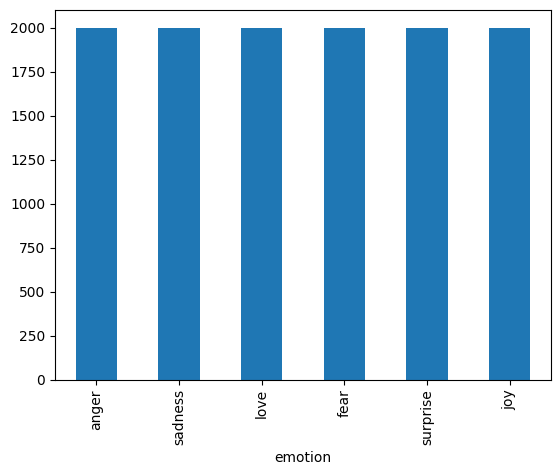

In [39]:
df['emotion'].value_counts().plot.bar()

In [40]:
# shows the graph of words per text
t = df['message'].str.split(" ").apply(len)

In [41]:
t # we can see here how many words per message (row)

,message
0,41
1,13
2,46
3,8
4,16
...,...
11995,26
11996,20
11997,4
11998,29


<Axes: ylabel='Frequency'>

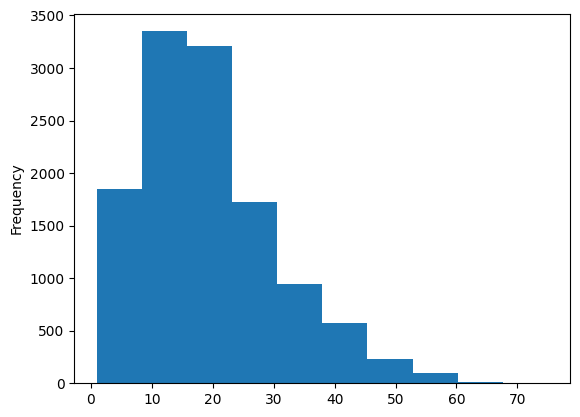

In [42]:
t.plot.hist()

In [43]:
copy = df[df['message'].str.split(" ").apply(len) < 45].copy()

In [44]:
values = copy['message']
values

,message
0,i used to be able to hang around talk with the...
1,i get made to feel left out and unimportant in...
3,i feel extremely delicate and a bit helpless
4,i feel frightened that i might fail to notice ...
5,i feel stubborn because i just want my seattle...
...,...
11995,i feel useless for wasting k hours k just for ...
11996,i feel rushed and pulled and rung out and i kn...
11997,i feel absolutely disgusted
11998,i know that we are all sinners and fall short ...


In [45]:
vocabulary = []
for text in values:
  for word in text.split(" "):
    vocabulary.append(word)

In [46]:
len(set(vocabulary))

12665

In [47]:
max_vocabulary_size = 10000

In [48]:
x, y = copy['message'], pd.get_dummies(copy['emotion'])

In [49]:
y

,anger,fear,joy,love,sadness,surprise
0,True,False,False,False,False,False
1,False,False,False,False,True,False
3,False,False,False,True,False,False
4,False,True,False,False,False,False
5,True,False,False,False,False,False
...,...,...,...,...,...,...
11995,False,False,False,False,True,False
11996,True,False,False,False,False,False
11997,True,False,False,False,False,False
11998,False,False,False,False,True,False


In [50]:
y.shape

(11607, 6)

In [51]:
y.shape[1] # number of output classes

6

In [53]:
x

,message
0,i used to be able to hang around talk with the...
1,i get made to feel left out and unimportant in...
3,i feel extremely delicate and a bit helpless
4,i feel frightened that i might fail to notice ...
5,i feel stubborn because i just want my seattle...
...,...
11995,i feel useless for wasting k hours k just for ...
11996,i feel rushed and pulled and rung out and i kn...
11997,i feel absolutely disgusted
11998,i know that we are all sinners and fall short ...


In [55]:
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [56]:
tokenizer = Tokenizer(num_words=max_vocabulary_size)
tokenizer.fit_on_texts(train_X.values)
train_X = tokenizer.texts_to_sequences(train_X)
test_X = tokenizer.texts_to_sequences(test_X)

In [ ]:
train_X

In [58]:
train_X = sequence.pad_sequences(train_X, maxlen=y.shape[1])
test_X = sequence.pad_sequences(test_X, maxlen=y.shape[1])

In [59]:
train_X

array([[   0,    0,    1,   66,    2,  284],
       [   5, 1069, 3575,    3, 5138, 3576],
       [   0,    1,    2,  499,  142,  971],
       ...,
       [   3,  879,  579,   35,    5,   53],
       [   0,    0,    1,    2,  260,  106],
       [   1,  111,   42, 1791, 2645,  296]], dtype=int32)

In [60]:
model = Sequential([
    Embedding(input_dim=max_vocabulary_size, output_dim=128), # creates word embbedings for each word, output_dim - the length of each word embbeding
    Conv1D(filters=32, kernel_size=4, padding="same", activation="relu"), # filters - extracts 32 features, kernel_size - how many words is the model going to look through in one timestep
    MaxPooling1D(pool_size=2), # reduces the sequence length in half keeping only important features
    Conv1D(filters=64, kernel_size=4, padding="same", activation="relu"),
    MaxPooling1D(pool_size=2),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True),
    LSTM(64, dropout=0.1, recurrent_dropout=0.1), # dropout and recurrent_dropout: Prevents overfitting
    Dense(y.shape[1], activation="softmax") # softmax converts outputs into probabilities for classification
])

In [61]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["precision", "recall", "f1_score"]
)

In [62]:
history = model.fit(train_X, train_y, validation_split=0.2, batch_size=64, epochs=3)

Epoch 1/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - f1_score: 0.0758 - loss: 1.7915 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_f1_score: 0.1894 - val_loss: 1.7364 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - f1_score: 0.3254 - loss: 1.5305 - precision: 0.6589 - recall: 0.0899 - val_f1_score: 0.4642 - val_loss: 1.3430 - val_precision: 0.8091 - val_recall: 0.3080
Epoch 3/3
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - f1_score: 0.6322 - loss: 0.9607 - precision: 0.7857 - recall: 0.4610 - val_f1_score: 0.4961 - val_loss: 1.3465 - val_precision: 0.7241 - val_recall: 0.4028


In [72]:
preds = model.predict(test_X)

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [73]:
test_y = test_y.values.argmax(axis=1)
preds = preds.argmax(axis=1)

In [80]:
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.56      0.43      0.49       418
           1       0.55      0.43      0.49       399
           2       0.28      0.48      0.36       358
           3       0.53      0.55      0.54       378
           4       0.57      0.41      0.48       383
           5       0.52      0.54      0.53       386

    accuracy                           0.47      2322
   macro avg       0.50      0.47      0.48      2322
weighted avg       0.50      0.47      0.48      2322



<Axes: >

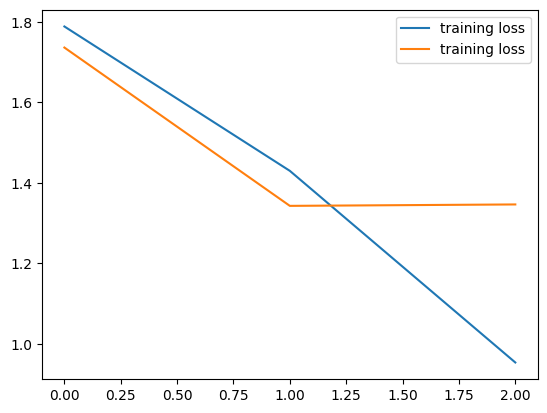

In [76]:
sns.lineplot(history.history['loss'], label = 'training loss')
sns.lineplot(history.history['val_loss'], label = 'training loss')